In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt  
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_6S9s118.csv', 'test_yjmNP1A.csv']


In [2]:
train = pd.read_csv('../input/train_6S9s118.csv')
test = pd.read_csv('../input/test_yjmNP1A.csv')

In [3]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,26.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,30.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,45.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,43.0,2,N,4.0,1


In [4]:
train.shape

(73147, 16)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          67303 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          28905 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


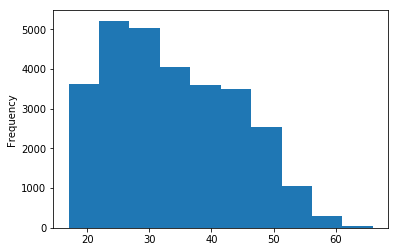

In [7]:
test['age'].plot.hist()

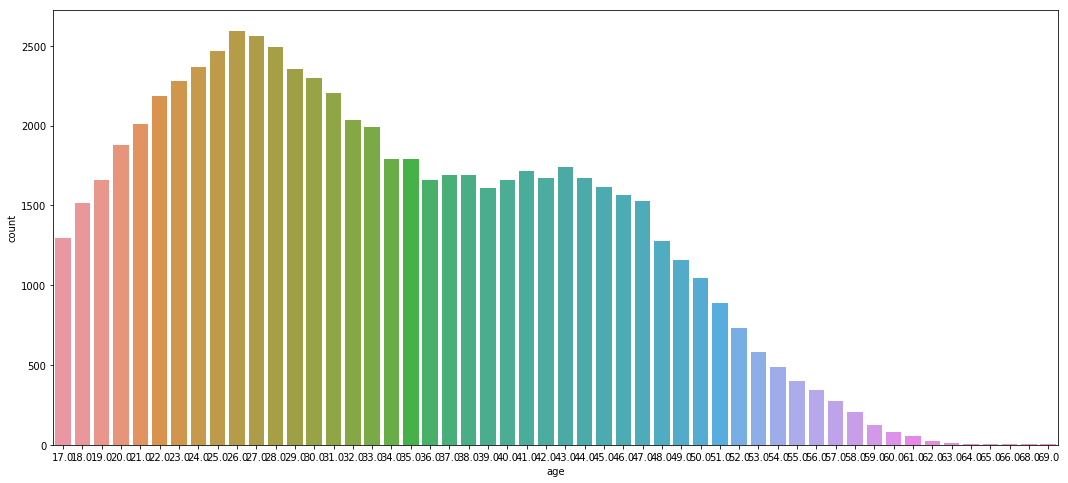

In [8]:
plt.figure(figsize = (18,8))
sns.countplot(train['age'])

In [9]:
## Let's decide range of age to be 17_30 , 30_40 , 40_50 , 50+ 
## first we will concatenate train and test to final , then train a xgboost to fill the missing values of age 
final = pd.concat([train, test])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


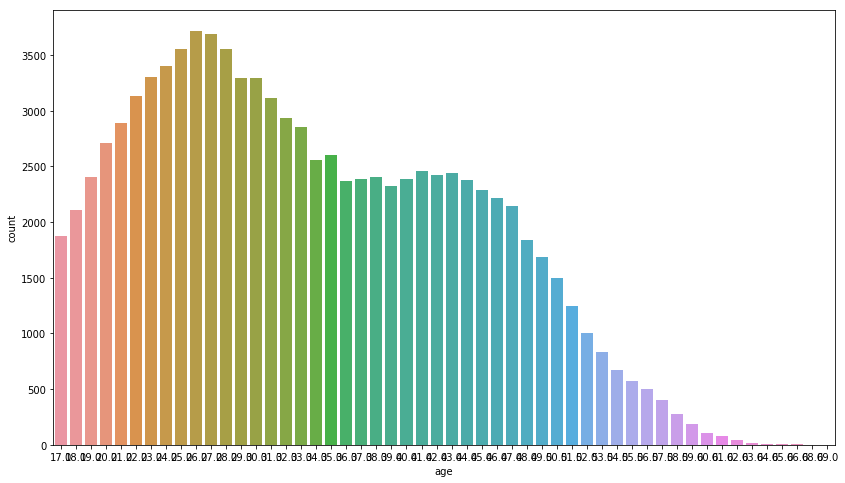

In [10]:
plt.figure(figsize = (14,8))
sns.countplot(final['age'])

In [11]:
final.shape

(104496, 16)

In [12]:
final.columns


Index(['age', 'city_tier', 'difficulty_level', 'education', 'gender', 'id',
       'is_handicapped', 'is_pass', 'program_duration', 'program_id',
       'program_type', 'test_id', 'test_type', 'total_programs_enrolled',
       'trainee_engagement_rating', 'trainee_id'],
      dtype='object')

## columns we will be choosing to fill age value 
## ddfds


In [13]:
final['age'].isnull().sum() / len(final)

0.07931404072883172

In [14]:
final['age'].fillna(999, inplace = True)

In [15]:
e = final[final['age'] == 999]   ## predict age on this dataset
e.index
final_e = final.drop(e.index)
final_e['age'].max()    ## cross check

69.0

## Let's do some multivariate analysis ona age, so that we can decide which features we have }to select to  apply xgboost.


In [16]:
s = pd.Series(['a', 'b', 'a', 'c'])
dummies = pd.get_dummies(s)
print(type(dummies))
s1 = dummies.idxmax(axis = 1)
(s1 == s).all

<class 'pandas.core.frame.DataFrame'>


<bound method Series.all of 0    True
1    True
2    True
3    True
dtype: bool>

In [17]:
final_e['age17_30'] = [1 if ((i>=17)&(i<30)) else 0 for i in final_e.age]
final_e['age30_40'] = [1 if ((i>=30)&(i<40)) else 0 for i in final_e.age]
final_e['age40+'] = [1 if (i>40) else 0 for i in final_e.age]

## we actually created the dummy variable and now we are going to make a singler categorical dat out of it.
## How with the help of idxmax
print(type(final_e['age17_30']))
dat = [final_e['age17_30'], final_e['age30_40'], final_e['age40+']]

final_age = pd.concat(dat , axis = 1)
final_age = pd.DataFrame(final_age) 
 ## now we can use idxmax 
    
w = final_age.idxmax(axis = 1)
w

## rplace final_e['age'] with the w
final_e['age'] = w 
final_e['age']






/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.series.Series'>


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0        age17_30
1        age30_40
2          age40+
4          age40+
5        age17_30
6          age40+
7        age17_30
8        age17_30
9        age17_30
10       age17_30
12       age30_40
13       age17_30
14       age17_30
15       age30_40
16       age17_30
17       age17_30
18       age17_30
19       age17_30
20       age17_30
22       age17_30
23       age17_30
24       age17_30
27       age17_30
28       age17_30
29         age40+
30       age17_30
31       age17_30
32         age40+
33       age30_40
34       age30_40
           ...   
31316    age30_40
31318    age17_30
31319    age17_30
31320    age30_40
31321    age30_40
31322    age17_30
31323    age17_30
31324    age30_40
31325    age17_30
31326    age30_40
31328    age30_40
31329    age30_40
31330    age17_30
31331    age17_30
31332    age17_30
31333    age17_30
31334    age17_30
31335      age40+
31336    age17_30
31337    age17_30
31338    age30_40
31339    age30_40
31340      age40+
31341    age17_30
31342    a

In [18]:
## First goal is to fill the missing va;lues then only we can make some progress 

In [19]:
final_e.head()

,age,city_tier,difficulty_level,education,gender,id,is_handicapped,is_pass,program_duration,program_id,program_type,test_id,test_type,total_programs_enrolled,trainee_engagement_rating,trainee_id,age17_30,age30_40,age40+
0,age17_30,3,intermediate,Matriculation,M,9389_150,N,0.0,136,Y_1,Y,150,offline,5,1.0,9389,1,0,0
1,age30_40,4,easy,High School Diploma,F,16523_44,N,1.0,131,T_1,T,44,offline,2,3.0,16523,0,1,0
2,age40+,1,easy,Matriculation,M,13987_178,N,1.0,120,Z_2,Z,178,online,1,2.0,13987,0,0,1
4,age40+,1,intermediate,High School Diploma,F,10591_84,N,1.0,131,V_3,V,84,offline,2,4.0,10591,0,0,1
5,age17_30,1,intermediate,High School Diploma,F,12531_23,N,0.0,134,T_3,T,23,offline,4,2.0,12531,1,0,0


## Now lets see what are the diferent factors which are going to affetcthe age group of a person. Now perform Multivariate analysis on different variables.



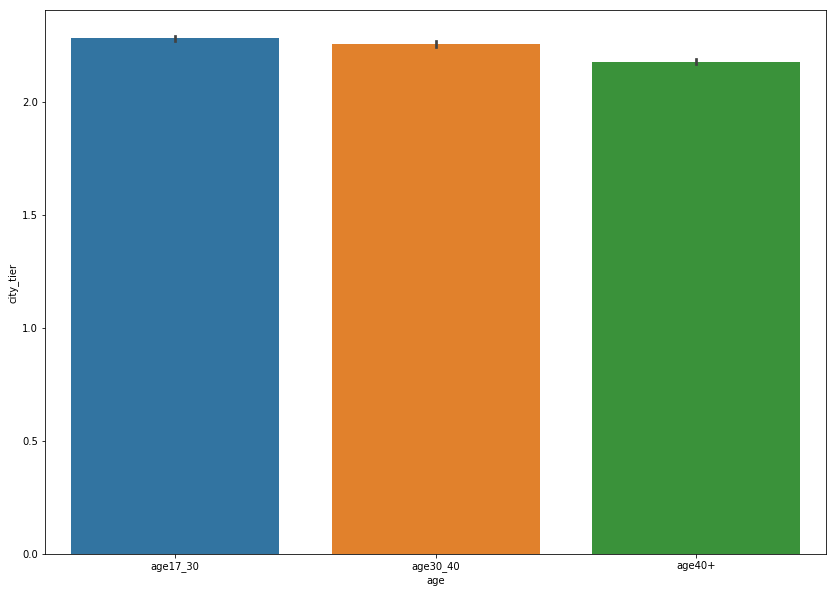

In [20]:
plt.figure(figsize = (14,10))
sns.barplot(x = 'age', y = 'city_tier', data = final_e)

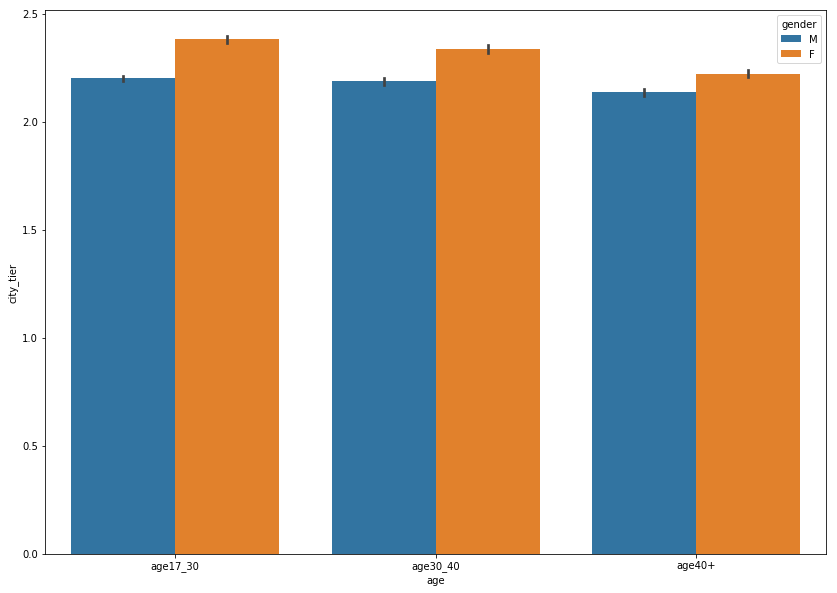

In [21]:
plt.figure(figsize = (14,10))
sns.barplot(x = 'age', y = 'city_tier', hue = 'gender', data = final_e)

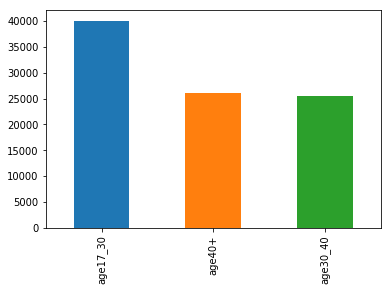

In [22]:
final_e['age'].value_counts().plot(kind = 'bar')

In [23]:
## let's fill some missing values and then we will try some tree based modelling.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          67303 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


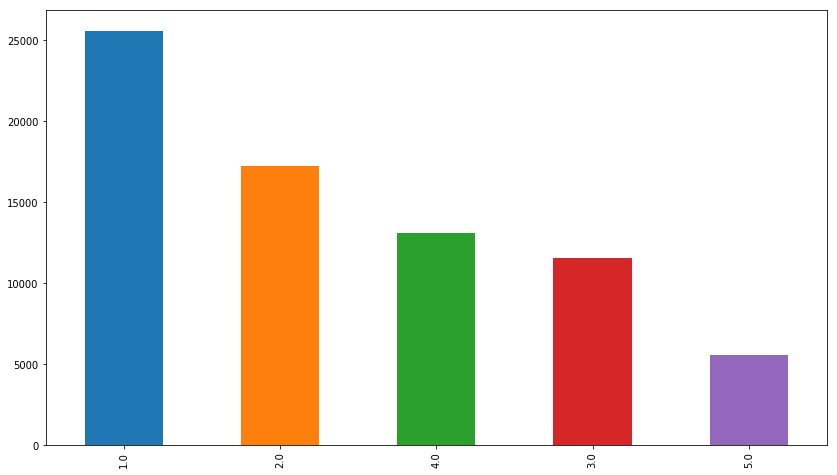

In [24]:
plt.figure(figsize = (14,8))
train['trainee_engagement_rating'].value_counts().plot(kind = 'bar')

In [25]:
## Fill the trainee_engagement_rating with the mode valu
train['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode(), inplace = True)

## age is also having missing value i will let my model handle those missing values

In [26]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,26.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,30.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,45.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,43.0,2,N,4.0,1


In [27]:
## age features age17_40 and age 40+ put all the missing values into the age 17_40
train['age'].fillna(30, inplace = True)

In [28]:
train['age17_40'] = [1 if ((i>=17)&(i<40)) else 0 for i in train.age]
train['age40+'] = [1 if i >= 40 else 0 for i in train.age]


,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,age17_40,age40+
0,Y,136,offline,intermediate,M,Matriculation,3,5,N,1.0,0,1,0
1,T,131,offline,easy,F,High School Diploma,4,2,N,3.0,1,1,0
2,Z,120,online,easy,M,Matriculation,1,1,N,2.0,1,0,1
3,T,117,offline,easy,F,Matriculation,3,4,N,1.0,1,1,0
4,V,131,offline,intermediate,F,High School Diploma,1,2,N,4.0,1,0,1


In [ ]:
set(train['total_programs_enrolled'])

## ideas for feature engg 
* can give ranges to the program_duration.
* fuse both bachelors and masters to be the same reading, since people are doing sales job. So bachelors or masters doesn't make much difference.
* total programs enrolled >5 is 5+ because of less number of people
* for total_programs_enrolled we can make 8 for 8+ readings
* Dont forget to do the bivariate analysis so that you know what is the difference in thier structure after you did some feature transformation. You will be able to interpret your own model.

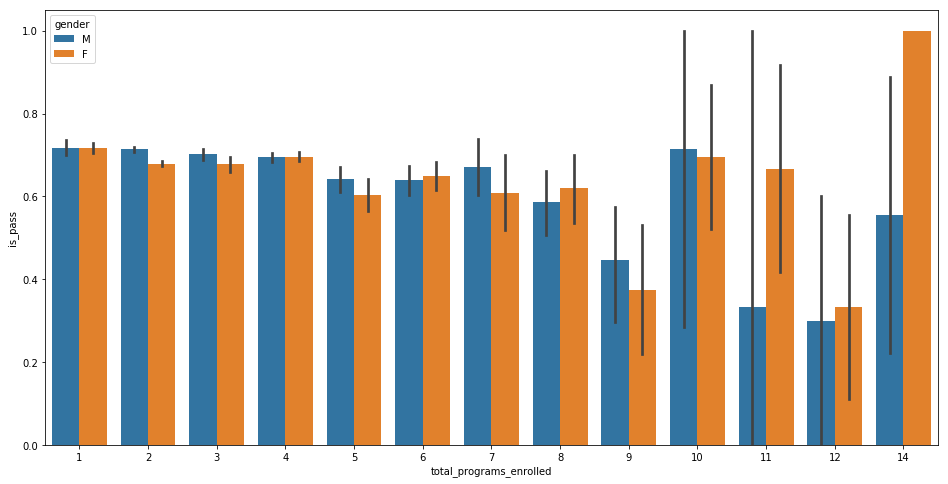

In [30]:
## if yuo are enrolled in more no of programs, then your sucess rate will be good or not 
plt.figure(figsize = (16,8))
sns.barplot(x = 'total_programs_enrolled' , y = 'is_pass' , hue = 'gender', data = train)



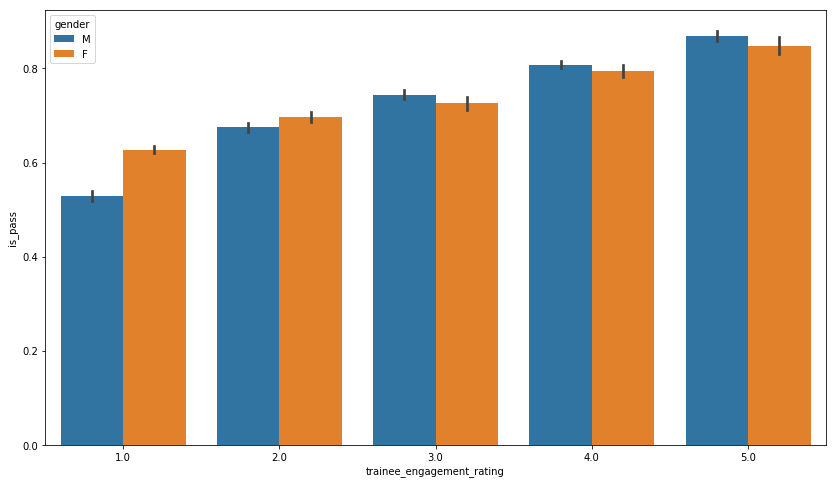

In [31]:
plt.figure(figsize = (14,8))
sns.barplot(x  = 'trainee_engagement_rating' , y = 'is_pass', hue ='gender' , data = train)

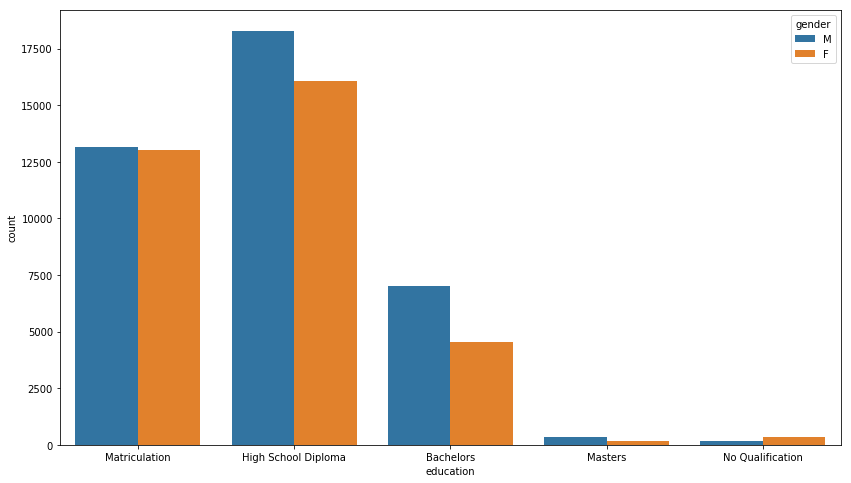

In [32]:
plt.figure(figsize = (14,8))
sns.countplot(x = 'education' , hue = 'gender', data = train)

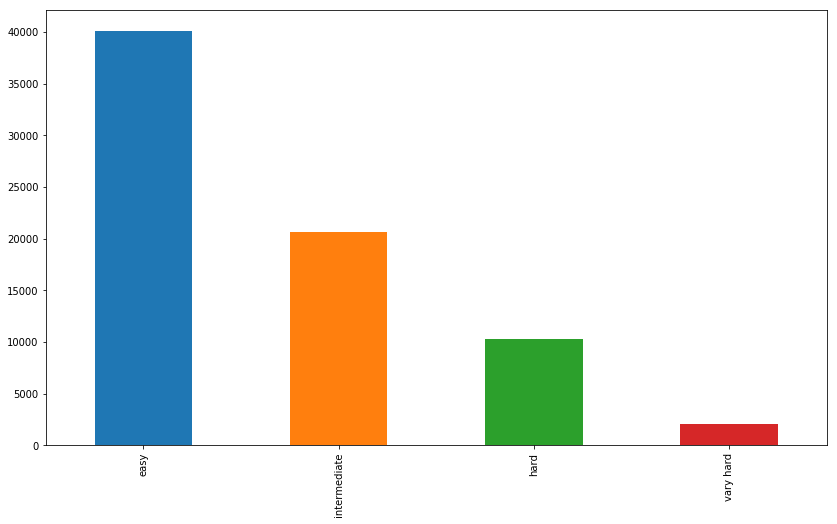

In [38]:
plt.figure(figsize = (14,8))
train['difficulty_level'].value_counts().plot(kind = 'bar')

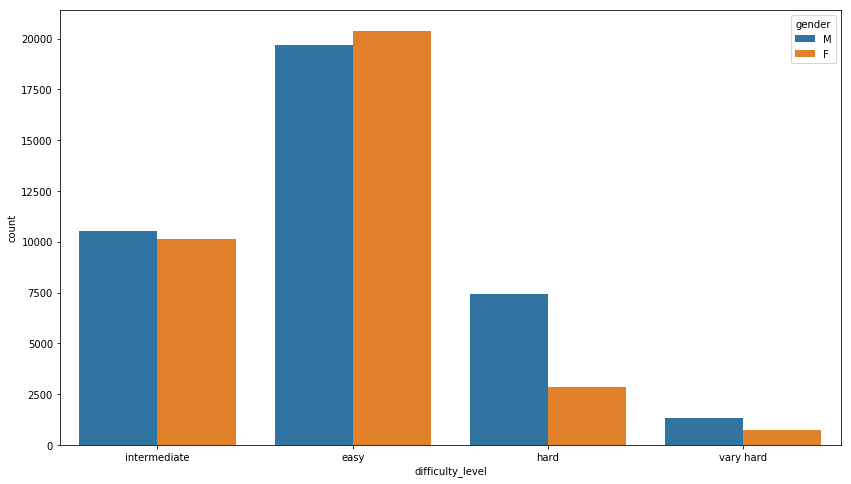

In [33]:
plt.figure(figsize = (14,8))
sns.countplot(x = 'difficulty_level' , hue = 'gender', data = train)

## The graph says womens dont prefer hard courses, but men are willing to take hard courses.

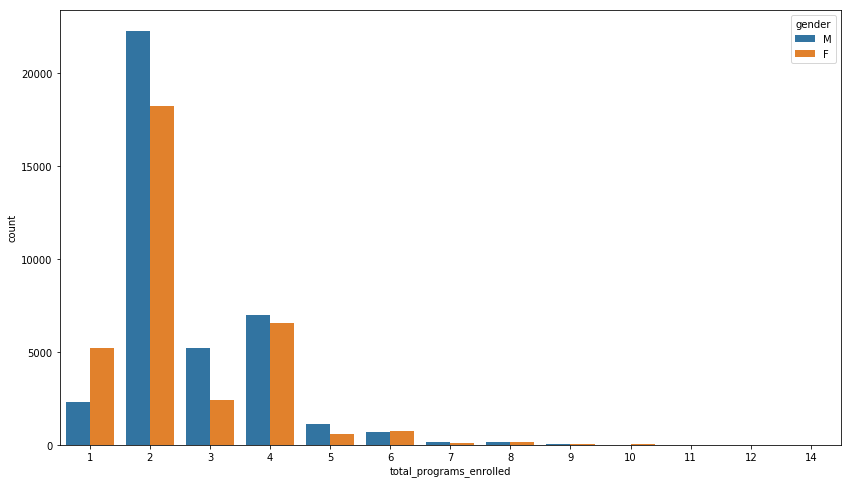

In [49]:
plt.figure(figsize = (14,8))
sns.countplot(x = 'total_programs_enrolled', hue = 'gender', data = train)

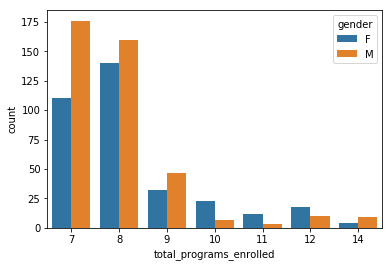

In [58]:
## This doesn't give a clear picture for the value > 6
w = train[train['total_programs_enrolled'] > 6]
sns.countplot(x = 'total_programs_enrolled', hue = 'gender', data = w)

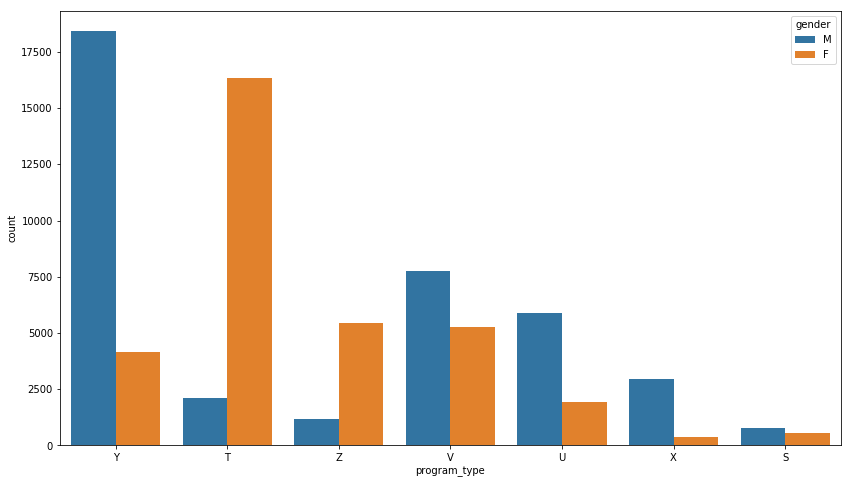

In [59]:
## just for fun 
plt.figure(figsize = (14,8))
sns.countplot(x = 'program_type', hue = 'gender', data = train)
#sns.countplot(x = 'test_type', hue  = 'gender')

In [ ]:
## This is no pattern for the program_type

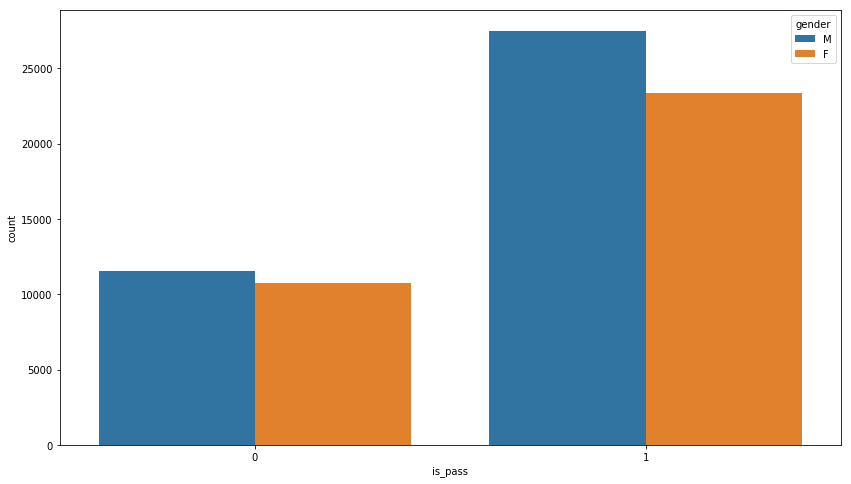

In [60]:
plt.figure(figsize = (14,8))
sns.countplot(x = 'is_pass', hue = 'gender', data = train)

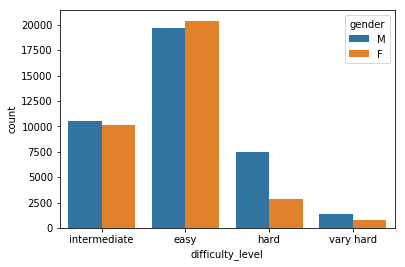

In [48]:
sns.countplot(x = 'difficulty_level', hue = 'gender', data = train)

## Symmetric ratio of male and female when it comes to passing the test.

In [62]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,age17_40,age40+
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,26.0,5,N,1.0,0,1,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,30.0,2,N,3.0,1,1,0
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,45.0,1,N,2.0,1,0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,30.0,4,N,1.0,1,1,0
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,43.0,2,N,4.0,1,0,1


In [93]:
def prep_data(train):
    ## preparing data to feed in the model 
    ## in this block treated program_type, program_duration, education, test_type, difficulty_level,gender, is_handicapped

    train['education'] = train['education'].replace('High School Diploma' , 1)
    train['education'] = train['education'].replace('Matriculation' , 2)
    train['education'] = train['education'].replace('Bachelors' , 3)
    train['education'] = train['education'].replace('No Qualification' , 0)
    train['education'] = train['education'].replace('Masters' , 4)   ## we will make masters also 3 in our modified model 

    ## test_type
    train['test_type'] = train['test_type'].replace('offline' , 0)
    train['test_type'] = train['test_type'].replace('online' , 1)

## program_duration
    train['program_duration'] = train['program_duration'].replace(117 , 0)
    train['program_duration'] = train['program_duration'].replace(120 , 1)
    train['program_duration'] = train['program_duration'].replace(121 , 2)
    train['program_duration'] = train['program_duration'].replace(122 , 3)
    train['program_duration'] = train['program_duration'].replace(130 , 4)
    train['program_duration'] = train['program_duration'].replace(131 , 5)
    train['program_duration'] = train['program_duration'].replace(133 , 6)
    train['program_duration'] = train['program_duration'].replace(134 , 7)
    train['program_duration'] = train['program_duration'].replace(135 , 8)
    train['program_duration'] = train['program_duration'].replace(136 , 9)

## difficulty level
    train['difficulty_level'] = train['difficulty_level'].replace('easy' , 0)
    train['difficulty_level'] = train['difficulty_level'].replace('intermediate' , 1)
    train['difficulty_level'] = train['difficulty_level'].replace('hard' , 2)
    train['difficulty_level'] = train['difficulty_level'].replace('vary hard' , 3)

## gender
    train['gender'] = train['gender'].replace('M', 0)
    train['gender'] = train['gender'].replace('F', 1)

## is handicapped
    train['is_handicapped'] = train['is_handicapped'].replace('N', 0)
    train['is_handicapped'] = train['is_handicapped'].replace('Y', 1)

## program_type 
    train['program_type'] = train['program_type'].replace('S' , 0)
    train['program_type'] = train['program_type'].replace('T' , 1)
    train['program_type'] = train['program_type'].replace('U' , 2)
    train['program_type'] = train['program_type'].replace('V' , 3)
    train['program_type'] = train['program_type'].replace('X' , 4)
    train['program_type'] = train['program_type'].replace('Y' , 5)
    train['program_type'] = train['program_type'].replace('Z' , 6)
    
    return train


In [94]:
train = prep_data(train)

In [95]:
train.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,age17_40,age40+
0,5,9,0,1,0,2,3,5,0,1.0,0,1,0
1,1,5,0,0,1,1,4,2,0,3.0,1,1,0
2,6,1,1,0,0,2,1,1,0,2.0,1,0,1
3,1,0,0,0,1,2,3,4,0,1.0,1,1,0
4,3,5,0,1,1,1,1,2,0,4.0,1,0,1


In [71]:
## feature selection step
## columns to drop from the training data
col_drop = ['program_id', 'id', 'test_id', 'age', 'trainee_id']
train.drop(col_drop, axis = 1, inplace = True)


KeyError: "labels ['program_id' 'id' 'test_id' 'age' 'trainee_id'] not contained in axis"

In [99]:
train.shape

(73147, 13)

## I didnot see that there is any good age indicator present here so we will simply drop the idea of filling the age and we will try mopre tree based model.
## Let's start with LGBM

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, r2_score, accuracy_score, classification_report 




In [84]:
train.columns

Index(['program_type', 'program_duration', 'test_type', 'difficulty_level',
       'gender', 'education', 'city_tier', 'total_programs_enrolled',
       'is_handicapped', 'trainee_engagement_rating', 'is_pass', 'age17_40',
       'age40+'],
      dtype='object')

In [81]:
## Split the data 
y = train['is_pass'] 
x = train.drop('is_pass', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 89)

In [86]:
#switch off depreciation & user warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

import lightgbm as lgb 

lgbm = lgb.LGBMClassifier(nthread = 4, boosting_type = 'dart')

#grid search for finding optimum learning rate
param_grid  = {'learning_rate': [0.08, 0.09, 0.1]}
grid_search = GridSearchCV(lgbm, param_grid, scoring='roc_auc', cv=10)
grid_result = grid_search.fit(x, y)

#update model parameters with new learning rate
lgbm.set_params(learning_rate = grid_result.best_params_['learning_rate'])

#using cv function of xgboost to find the optimum number of trees
lgbm_param = lgbm.get_params()
lgbm_train = lgb.Dataset(X_train, y_train,
                         categorical_feature = ['gender', 'education', 'city_tier', 'total_programs_enrolled',
       'is_handicapped', 'trainee_engagement_rating', 'age17_40',
       'age40+','test_type', 'difficulty_level'])
cvresult = lgb.cv(lgbm_param, lgbm_train, num_boost_round=1000, metrics=['auc'], early_stopping_rounds=50)

#update model parameters with the resulting number of trees
lgbm.set_params(n_estimators=len(cvresult['auc-mean']))

lgbm.fit(X_train, y_train)
print (lgbm)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=87,
        n_jobs=-1, nthread=4, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)


In [87]:
y_pre = lgbm.predict(X_test)

In [89]:
print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_pre)))

AUC: 0.5991


In [90]:
## Auc score disappoints me stil we will try and make a submission best PB score .67
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,50.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,22.0,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,24.0,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,27.0,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,18.0,2,N,2.0


In [91]:
ids = test['id']

In [96]:
test = prep_data(test)
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,1,5,45,0,1,1626,1,2,3,50.0,2,0,4.0
1,11020_130,Y_3,5,8,130,1,0,11020,0,3,3,22.0,4,0,4.0
2,12652_146,Y_2,5,1,146,1,0,12652,0,2,3,24.0,2,0,3.0
3,7038_72,V_4,3,3,72,0,3,7038,1,1,1,27.0,2,0,2.0
4,888_71,V_4,3,3,71,0,1,888,1,2,3,18.0,2,0,2.0


In [97]:
## add age feature 
test['age'].fillna(30, inplace = True)

test['age17_40'] = [1 if ((i>=17)&(i<40)) else 0 for i in test.age]
test['age40+'] = [1 if i >= 40 else 0 for i in test.age]

## feature selection step
## columns to drop from the data
col_drop = ['program_id', 'id', 'test_id', 'age', 'trainee_id']
test.drop(col_drop, axis = 1, inplace = True)


In [103]:
test['trainee_engagement_rating'].fillna(1, inplace = True)

In [105]:
test.shape

(31349, 12)

In [106]:
pre = lgbm.predict(test)

In [109]:
## Build a datframe and convert it to csv
sub = pd.DataFrame({'id':ids, 'is_pass':pre })
sub.to_csv('Submission2.csv',index = False)